In [1]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import io

DAILY_TREND_JSON = 'data/dailyTrend.json'



In [3]:
print('foo')

df = pd.read_json(DAILY_TREND_JSON)
df['datet'] = df['name'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
df['dow'] = df['datet'].apply(lambda x: x.strftime('%A'))

df.tail()

foo


,name,Tokyo,7dayAvg,datet,dow
275,2020-11-20,522,375.000000,2020-11-20,Friday
276,2020-11-21,539,401.714286,2020-11-21,Saturday
277,2020-11-22,391,421.142857,2020-11-22,Sunday
278,2020-11-23,314,440.285714,2020-11-23,Monday
279,2020-11-24,186,424.285714,2020-11-24,Tuesday


In [4]:
import requests
import io

s = io.StringIO(requests.get('https://www8.cao.go.jp/chosei/shukujitsu/syukujitsu.csv').content.decode('Shift-JIS'))
holidays = pd.read_csv(s)

last50holidays = holidays.iloc[-50:,0:2]
last50holidays = last50holidays.rename(columns={'国民の祝日・休日月日':'hdate'})
last50holidays['datet'] = last50holidays['hdate'].apply(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d'))


Text(0.5,1,'Dow Rank 300')

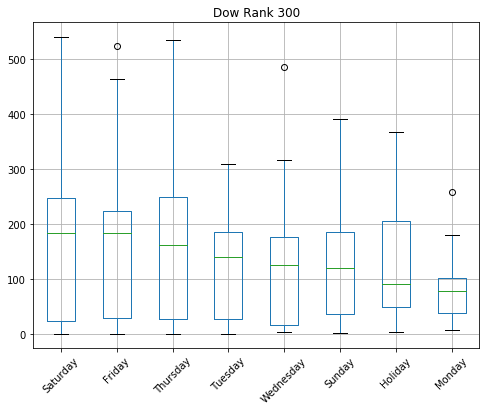

In [93]:
df2 = pd.merge(df, last50holidays, on='datet', how='left')
df2.loc[df2['hdate'].isnull() != True, 'dow'] = 'Holiday'
df2_sorted = df2[['dow','Tokyo']].groupby('dow').median().sort_values(by='Tokyo', ascending=False)

#df2 = df2[df2_sorted.index]
#df2[['dow','Tokyo']].tail(180).groupby(by='dow').boxplot(figsize=(8,10), subplots=False, fontsize=8, rot=45)
days = 300

def boxplot_sorted(df, by, column):
  df3 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df3.median().sort_values(ascending=False)
  df3[meds.index].boxplot(rot=45, figsize=(8,6))

boxplot_sorted(df2.tail(days), by=["dow"], column="Tokyo")
plt.title(f"Dow Rank {days}")
